In [1]:
import tensorflow as tf

In [2]:
video_path='/home/rohit/Desktop/video.mp4'

In [3]:
audio_clip='/home/rohit/Desktop/arctic_a0001.wav'

In [ ]:
#ffmpeg -i video.mp4 -f mp3 -ab 192000 -vn audio.mp3

In [5]:
from pydub import AudioSegment

sound1 = AudioSegment.from_mp3("./aww.mp3")
sound2 = AudioSegment.from_mp3("./audio.mp3")

# mix sound2 with sound1, starting at 5000ms into sound1)
output = sound2.overlay(sound1, position=20500)

# save the result
output.export("mixed_sound.mp3", format="mp3")

<open file 'mixed_sound.mp3', mode 'wb+' at 0x7fc84388c300>

In [16]:
#ffmpeg -i video.mp4 -i mixed_sound.mp3 -c copy -map 0:v -map 1:a result.mp4

In [19]:
import pysrt

# Loading the Subtitle
subs = pysrt.open('interstellar-english-yify-42252/Interstellar.2014.720p.BluRay.x264.YIFY.srt',
                 encoding='iso-8859-1')

len(subs)

1996

In [20]:
subs[0]

In [21]:
first_sub = subs[0]

In [28]:
# Subtitle text
text = first_sub.text
text_without_tags = first_sub.text_without_tags

# Start and End time
start = sub.start.to_time()
end = sub.end.to_time()

In [49]:
print(( (start.hour*3600) + (start.minute*60) + start.second)*1000,'millisecond' )
print(end.minute)

(74000, 'millisecond')
1


'\nThe titular threat of The Blob has always struck me as the ultimate movie\nmonster: an insatiably hungry, amoeba-like mass able to penetrate\nvirtually any safeguard, capable of--as a doomed doctor chillingly\ndescribes it--"assimilating flesh on contact.\nSnide comparisons to gelatin be damned, it\'s a concept with the most\ndevastating of potential consequences, not unlike the grey goo scenario\nproposed by technological theorists fearful of\nartificial intelligence run rampant.\n'

In [36]:
#-----------------------------------------------
from textblob import TextBlob

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
# 0.060
# -0.341

blob.translate(to="es")  # 'La amenaza titular de The Blob...'

# Sentiment Analysis
blob = TextBlob(text)
sentiment_polarity = blob.sentiment.polarity # -0.1590909090909091
sentiment_subjectivity = blob.sentiment.subjectivity # 0.693181818181818

0.06
-0.341666666667


In [37]:
from datetime import date, datetime, timedelta, time
import pysrt
from textblob import TextBlob
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
style.use('fivethirtyeight')

In [38]:
# Helper Function to create equally divided time intervals
# start - Starting Time
# end - Ending Time
# delta - Interval Period
def create_intervals(start, end, delta):
    curr = start
    while curr <= end:
        curr = (datetime.combine(date.today(), curr) + delta).time()
        yield curr

# Main Function to Get Sentiment Data
# file - srt file location
# delta - time interval in minutes
def get_sentiment(file, delta=2):
    # Reading Subtitle
    subs = pysrt.open(file, encoding='iso-8859-1')
    n = len(subs)
    # List to store the time periods
    intervals = []
    # Start, End and Delta
    start = time(0, 0, 0)
    end = subs[-1].end.to_time()
    delta = timedelta(minutes=delta)
    for result in create_intervals(start, end, delta):
        intervals.append(result)
    # List to store sentiment polarity
    sentiments = []
    
    index = 0
    m = len(intervals)
    # Collect and combine all the text in each time interval
    for i in range(m):
        text = ""
        for j in range(index, n):
            # Finding all subtitle text in the each time interval
            if subs[j].end.to_time() < intervals[i]:
                text += subs[j].text_without_tags + " "
            else:
                break
        # Sentiment Analysis
        blob = TextBlob(text)
        pol = blob.sentiment.polarity
        sentiments.append(pol)
        index = j
    # Adding Initial State
    intervals.insert(0, time(0, 0, 0))
    sentiments.insert(0, 0.0)
    return (intervals, sentiments)

# Utility to find average sentiment
def average(y):
    avg = float(sum(y))/len(y)
    return avg

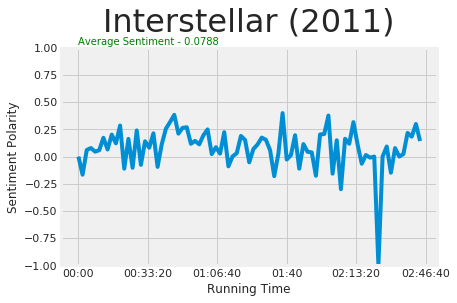

In [40]:
x, y = get_sentiment("./interstellar-english-yify-42252/Interstellar.2014.720p.BluRay.x264.YIFY.srt")
fig, ax = plt.subplots()
plt.plot(x, y)
plt.title("Interstellar (2011)", fontsize=32)
plt.ylim((-1, 1))
plt.ylabel("Sentiment Polarity")
plt.xlabel("Running Time")
plt.text(.5, 1.03, "Average Sentiment - " + str(round(average(y), 4)), color="green")
ttl = ax.title
ttl.set_position([.5, 1.05])